In [1]:
import numpy as np
import matplotlib.pyplot as plt
from environments.environment import Environment
from learners.Learner import Learner
from learners.greedy import Greedy
from learners.thompson_sampling import ThompsonSampling
from learners.ucb import UCB

In [2]:
n_arms = 4
p = np.array([0.15, 0.1, 0.1, 0.35])
opt = p[3]
T = 3000
n_experiments = 100

In [3]:
ts_rewards_per_experiment = []
greedy_rewards_per_experiment = []
ucb_rewards_per_experiment = []

In [4]:
for e in range (n_experiments):
    ts_env = Environment(n_arms, p)
    ts_learner = ThompsonSampling(n_arms)
    
    greedy_env = Environment(n_arms, p)
    greedy_learner = Greedy(n_arms)
    
    ucb_env = Environment(n_arms, p)
    ucb_learner = UCB(n_arms)
    
    for t in range (T):
        pulled_arm = ts_learner.pull_arm()
        reward = ts_env.round(pulled_arm)
        ts_learner.update(pulled_arm, reward)
        
        pulled_arm = greedy_learner.pull_arm()
        reward = greedy_env.round(pulled_arm)
        greedy_learner.update(pulled_arm, reward)
        
        pulled_arm = ucb_learner.pull_arm()
        reward = ucb_env.round(pulled_arm)
        ucb_learner.update(pulled_arm, reward)
        
    ts_rewards_per_experiment.append(ts_learner.collected_rewards)
    greedy_rewards_per_experiment.append(greedy_learner.collected_rewards)
    ucb_rewards_per_experiment.append(ucb_learner.collected_rewards)

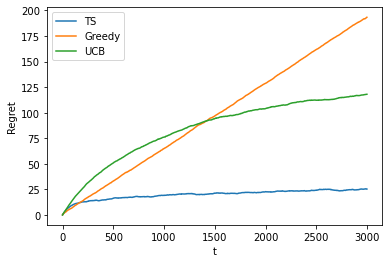

In [5]:
plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(np.cumsum(np.mean(opt - ts_rewards_per_experiment, axis=0)))
plt.plot(np.cumsum(np.mean(opt - greedy_rewards_per_experiment, axis=0)))
plt.plot(np.cumsum(np.mean(opt - ucb_rewards_per_experiment, axis=0)))
plt.legend(["TS", "Greedy", "UCB"])
plt.show()

In [7]:
help(Learner)

Help on class Learner in module learners.Learner:

class Learner(builtins.object)
 |  Learner(n_arms)
 |  
 |  Abstract class used to represent online learning algorithms.
 |  :param n_arms: the number of arms that can be pulled
 |  :type n_arms: int
 |  
 |  Methods defined here:
 |  
 |  __init__(self, n_arms)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  pull_arm(self) -> int
 |      Compute the best arm to pull according to the current parameter of the learner.
 |      
 |      :return:  the best arm to pull
 |  
 |  update(self, pulled_arm, reward)
 |      Update the parameters of the learner according the the reward received by the environment, and the pulled arm.
 |      
 |      :param pulled_arm: the arm that was pulled
 |      :param reward: the reward received by the environment
 |      :return: void
 |  
 |  update_observations(self, pulled_arm, reward)
 |      Update the collected reward of the pulled arm, and the total reward achieved.
 |